RIESGO DE CRÉDITO (ALEMANIA)
===

**Monica Andrea Vivas Tristancho**  
mavivast@unal.edu.co   
Universidad Nacional de Colombia  
Facultad de Minas  
Medellín, Colombia

# Definición del problema real

El objetivo del problema es mejorar los procedimientos de aprobación de créditos con el fin de disminuir el riesgo de no pago de la deuda pues esto trae perdidas para la institución.
De esta forma se busca decidir si se aprueba o no un crédito particular teniendo en cuenta si lo clasifica como un crédito con riesgo bueno o riesgo malo con base en información que puede ser facilmente recolectada por telefono o en la web.


# Definición del problema en términos de los datos

Se tiene una muestra de 1000 observaciones. Cada registro contiene 20 atributos que recopilan información del crédito y de la situación financiera del solicitante.

Estos datos fueron recolectados por una institución alemana y se encuentra disponible en:
http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/.

A continuación se listan las 20 variables, su descripción y para las categoricas las opciones que tiene y el significado de cada una de estas.

La variable respuesta corresponde al Atributo 21 que indica si el riesgo es Bueno (1) o Malo (2), en caso de que el riesgo sea bueno quiere decir que se puede aprobar el credito, contrario a si el riesgo es malo en cuyo caso se niega el crédito.

#### Descriipción de los atributos
   **Attribute 1 (checking_balance):** Status of existing checking account (qualitative)
	       
           A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
           A14 : no checking account

   **Attribute 2 (duration_month):** Duration in month (numerical)
	      
   **Attribute 3 (credit_history):** Credit history (qualitative)
	      
          A30 : no credits taken/all credits paid back duly
          A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
          A33 : delay in paying off in the past
	      A34 : critical account/other credits existing (not at this bank)

   **Attribute 4 (purpose):** Purpose (qualitative)
	      
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

   **Attribute 5 (credit_amount):** Credit amount (numerical)
	      
   **Attribute 6 (savings_balance):** Savings account/bonds (qualitative)
	      
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
          A65 :   unknown/ no savings account

   **Attribute 7 (employment_length):** Present employment since (qualitative)
	      
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

   **Attribute 8 (installment_rate):** Installment rate in percentage of disposable income (numerical)
	      
   **Attribute 9 (personal_status):** Personal status and sex (qualitative)
	      
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
          A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

   **Attribute 10 (other_debtors):** Other debtors / guarantors (qualitative)
	      
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

   **Attribute 11 (residence_history):** Present residence since (numerical)
	      
   **Attribute 12 (property):** Property (qualitative)
	      
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/life insurance
          A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

   **Attribute 13 (age):** Age in years (numerical)
	      
   **Attribute 14 (other_installment_plans):** Other installment plans (qualitative)
	       
	      A141 : bank
	      A142 : stores
	      A143 : none

   **Attribute 15 (housing):** Housing (qualitative)
	      
	      A151 : rent
	      A152 : own
	      A153 : for free

   **Attribute 16 (number_of_credits):** Number of existing credits at this bank (numerical)
              
   **Attribute 17 (job):** Job (qualitative)
	      
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/highly qualified employee/ officer

   **Attribute 18 (dependents):** Number of people being liable to provide maintenance for (numerical)
	      
   **Attribute 19 (telephone):** Telephone (qualitative)
	      
	      A191 : none
	      A192 : yes, registered under the customers name

   **Attribute 20 (foreign_worker):** foreign worker (qualitative)
	      
	      A201 : yes
	      A202 : no

   **Attribute 21 (risk):** classification risk (qualitative) - variable respuesta
          
          1 : good 
          2 : bad

# Importar librerías requeridas

In [1]:
#Librerias requeridas
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Importar datos

In [2]:
#Importar datos, agregar encabezado a las columnas y mostrar el contenido del archivo
datos = pd.read_csv('german.data.txt', sep=" ", header=None)
datos.columns = ["checking_balance", "duration_month", "credit_history", "purpose", "credit_amount", "savings_balance",
                 "employment_length", "installment_rate", "personal_status", "other_debtors", "residence_history", "property",
                 "age", "other_installment_plans", "housing", "number_of_credits", "job", "dependents", "telephone",
                 "foreign_worker", "risk"]
datos.head()

,checking_balance,duration_month,credit_history,purpose,credit_amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Análisis de variables

In [3]:
# Resumen inicial de las variables
total_var=len(datos.columns)
numero_var=len(datos._get_numeric_data().columns)
print(datos.dtypes, "\n\nNúmero de variables", total_var, "\nVariables Numéricas", numero_var, "\nVariables Categoricas", total_var-numero_var, "\nTotal Registros", len(datos))

checking_balance           object
duration_month              int64
credit_history             object
purpose                    object
credit_amount               int64
savings_balance            object
employment_length          object
installment_rate            int64
personal_status            object
other_debtors              object
residence_history           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_of_credits           int64
job                        object
dependents                  int64
telephone                  object
foreign_worker             object
risk                        int64
dtype: object 

Número de variables 21 
Variables Numéricas 8 
Variables Categoricas 13 
Total Registros 1000


In [4]:
# Variables categoricas
cat_labels = datos.iloc[:, [0,2,3,5,6,8,9,11,13,14,16,18,19]]
cat_labels.describe()

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [5]:
# Transforamción de variables categóricas
enc = LabelEncoder()
datos["checking_balance"] = enc.fit_transform(datos["checking_balance"])
datos["credit_history"] = enc.fit_transform(datos["credit_history"])
datos["purpose"] = enc.fit_transform(datos["purpose"])
datos["savings_balance"] = enc.fit_transform(datos["savings_balance"])
datos["employment_length"] = enc.fit_transform(datos["employment_length"])
datos["personal_status"] = enc.fit_transform(datos["personal_status"])
datos["other_debtors"] = enc.fit_transform(datos["other_debtors"])
datos["property"] = enc.fit_transform(datos["property"])
datos["other_installment_plans"] = enc.fit_transform(datos["other_installment_plans"])
datos["housing"] = enc.fit_transform(datos["housing"])
datos["job"] = enc.fit_transform(datos["job"])
datos["telephone"] = enc.fit_transform(datos["telephone"])
datos["foreign_worker"] = enc.fit_transform(datos["foreign_worker"])

In [6]:
# Ver el contenido del dataset con los datos transformados
datos.head()

,checking_balance,duration_month,credit_history,purpose,credit_amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [7]:
#Resumen de las variables (luego de la transformación)
total_var=len(datos.columns)
numero_var=len(datos._get_numeric_data().columns)

print(datos.dtypes, "\n\nNúmero de variables", total_var, "\nVariables Numéricas", numero_var, "\nVariables Categoricas", total_var-numero_var, "\nTotal Registros", len(datos))

checking_balance           int64
duration_month             int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_balance            int64
employment_length          int64
installment_rate           int64
personal_status            int64
other_debtors              int64
residence_history          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_of_credits          int64
job                        int64
dependents                 int64
telephone                  int64
foreign_worker             int64
risk                       int64
dtype: object 

Número de variables 21 
Variables Numéricas 21 
Variables Categoricas 0 
Total Registros 1000


In [8]:
# Identificación y descripción de la variable respuesta
# Muestra la frecuencia de cada una de las opciones de respuesta

category_y=pd.Categorical(datos.risk)
category_y.describe()

,counts,freqs
categories,,
1,700,0.7
2,300,0.3


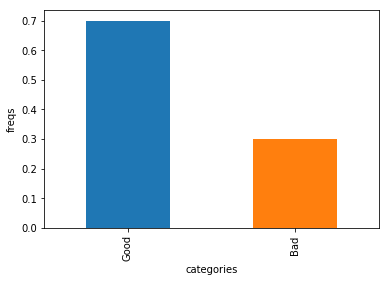

In [9]:
# Porción de la variable respuesta en el dataset - muestra grafica
category_y=pd.Categorical(datos.risk)
c=category_y.describe()
c=c.reset_index()
c.categories=c.categories.replace([1],'Good')
c.categories=c.categories.replace([2],'Bad')
c.plot(x='categories', y='freqs', kind="bar", legend =False)
plt.ylabel("freqs")
plt.show()

In [10]:
# Separar la variable respuesta del dataset
y = datos.loc[:,"risk"]
x = datos.iloc[:,0:20]
x_nombres = x.columns

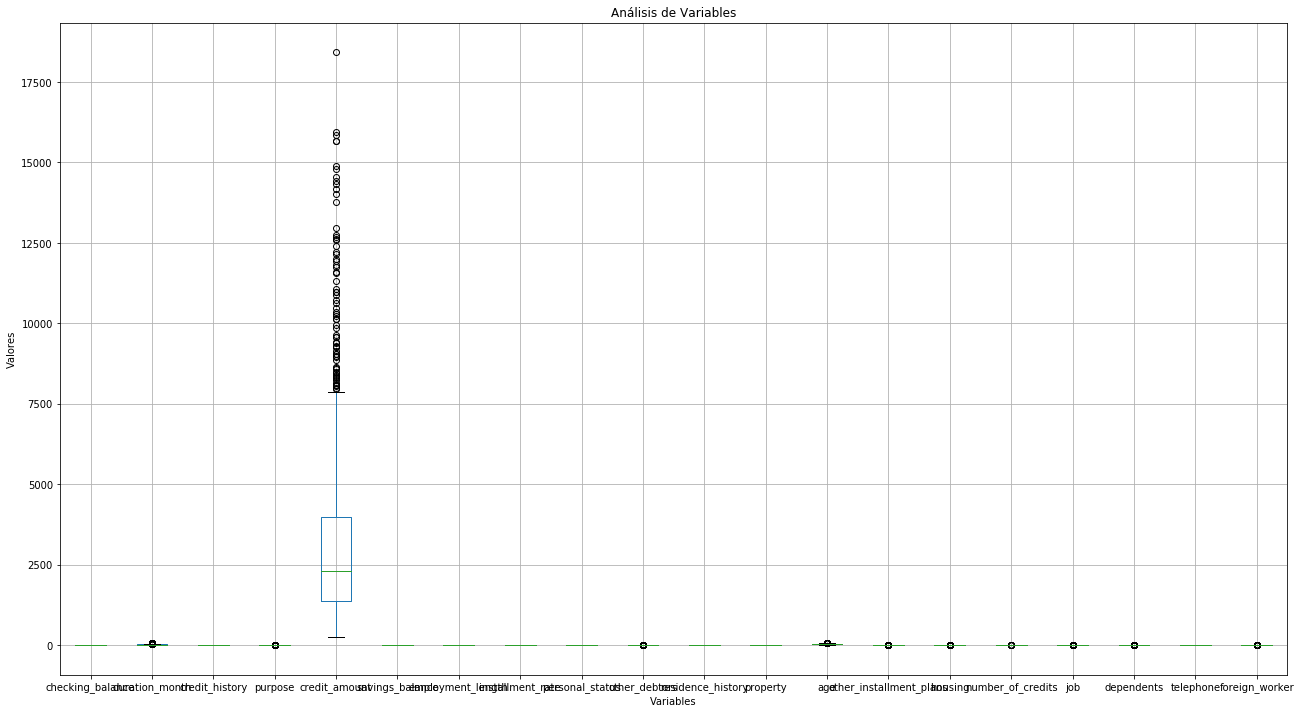

In [11]:
# Boxplot de las variables (sin incluir la variable respuesta)
plt.figure(figsize=(22,12))
x.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Análisis de Variables')
plt.grid(True)
plt.show()



Como se puede ver en la grafica anterior por sus características las variables no tienen un comportamiento estandar que permita realizar un buen análisis por lo que se procede a normalizar las variables sin incluir la variable respuesta.



In [12]:
# Normalizar las variables (sin incluir la variable respuesta)
scaler = MinMaxScaler()
x_escala = scaler.fit_transform(x)
x_escala = pd.DataFrame(x_escala, columns=x_nombres)

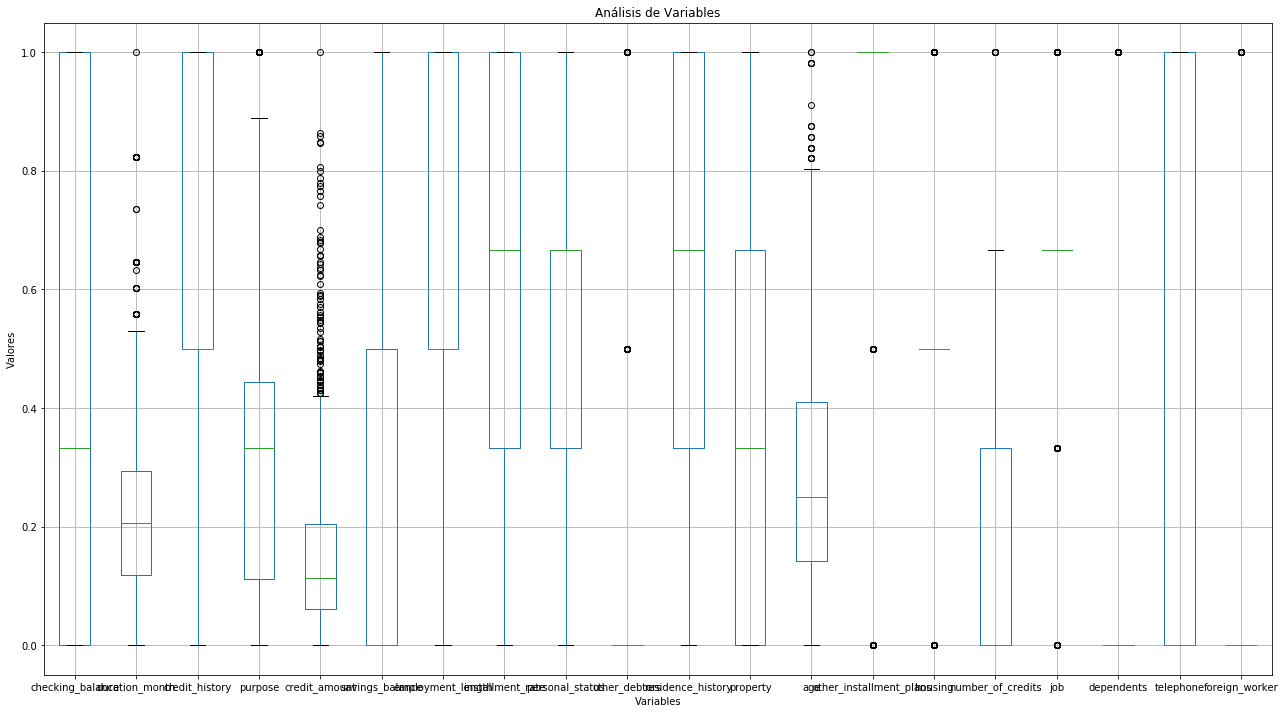

In [13]:
# Boxplot de las variables escaladas
plt.figure(figsize=(22,12))
x_escala.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Análisis de Variables')
plt.grid(True)
plt.show()

In [14]:
# Muestra el contenido de los datos luego de ser normalizadas
x_escala.head()

,checking_balance,duration_month,credit_history,purpose,credit_amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker
0,0.000000,0.029412,1.00,0.444444,0.050567,1.0,1.00,1.000000,0.666667,0.0,1.000000,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0
1,0.333333,0.647059,0.50,0.444444,0.313690,0.0,0.50,0.333333,0.333333,0.0,0.333333,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
2,1.000000,0.117647,1.00,0.777778,0.101574,0.0,0.75,0.333333,0.666667,0.0,0.666667,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0
3,0.000000,0.558824,0.50,0.333333,0.419941,0.0,0.75,0.333333,0.666667,1.0,1.000000,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.0,0.50,0.666667,0.666667,0.0,1.000000,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0


In [15]:
# Correlación de las variables normalizadas
x_escala.corr()

,checking_balance,duration_month,credit_history,purpose,credit_amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker
checking_balance,1.000000,-0.072013,0.192191,0.053223,-0.042705,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.059751,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,-0.026758
duration_month,-0.072013,1.000000,-0.077186,0.096027,0.624984,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.036136,-0.054884,0.157049,-0.011284,0.210910,-0.023834,0.164718,-0.138196
credit_history,0.192191,-0.077186,1.000000,-0.081634,-0.059905,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.147086,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,0.013873
purpose,0.053223,0.096027,-0.081634,1.000000,-0.030848,-0.024072,0.024990,0.078224,-0.003052,-0.032254,-0.062927,-0.031025,-0.030654,-0.039346,-0.019488,0.034958,-0.032655,-0.056450,0.018677,-0.124317
credit_amount,-0.042705,0.624984,-0.059905,-0.030848,1.000000,0.064630,-0.008367,-0.271316,-0.016091,-0.027832,0.028926,0.311599,0.032716,-0.046008,0.135632,0.020795,0.285385,0.017142,0.276995,-0.050050
savings_balance,0.222867,0.047661,0.039058,-0.024072,0.064630,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.084245,0.001908,0.006505,-0.021644,0.011709,0.027514,0.087208,0.007095
employment_length,0.106339,0.057381,0.138225,0.024990,-0.008367,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.256227,-0.040154,0.111126,0.125791,0.101225,0.097192,0.060518,-0.027232
installment_rate,-0.005280,0.074749,0.044375,0.078224,-0.271316,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.058266,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,-0.090024
personal_status,0.043261,0.014789,0.042171,-0.003052,-0.016091,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.007783,-0.036765,0.099579,0.064672,-0.011956,0.122165,0.027275,0.065618
other_debtors,-0.127737,-0.024490,-0.040676,-0.032254,-0.027832,-0.105069,-0.008116,-0.011398,0.050634,1.000000,-0.025678,-0.155450,-0.029873,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,0.117999


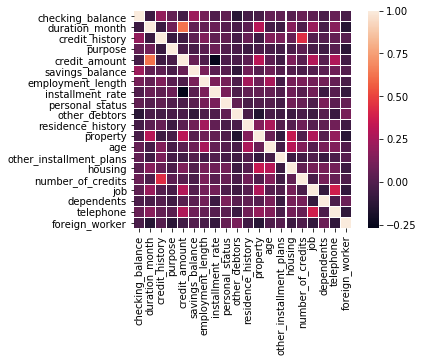

In [16]:
# Mapa de calor y correlación entre las variables
sns.heatmap(x_escala.corr(), square=True, linewidths=.1)


# Partición de datos de entrenamiento y prueba

In [17]:
# Separar los datos de entrenamiento y prueba
# (75% entrenamiento y 25% prueba)
x_train,x_test,y_train,y_test=train_test_split(x_escala, y, test_size=0.25)

# Vecinos más cercanos KNN

Se modelara con la técnica KNN vecinos mas cercanos evaluado en los hiper-parámetros 10, 15 y 20

In [19]:
# Modelado de KNN con ajuste de hiper-parámetro en 10

knn10=KNeighborsClassifier(n_neighbors = 10) #considera los 10 vecinos mas cercanos
puntajes_knn10 = cross_val_score(knn10, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro en 10
print("CV_Modelo_KNN_10:\t{}".format(puntajes_knn10)); print() # Mostrar resultados de validación cruzada

fit_knn10 = knn10.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_knn10); print()

y_test_pred_knn10 = knn10.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_knn10 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_knn10) # Matriz de confusion knn 10
print('Matriz_de_confusión_knn10:'); print(mc_knn10); print()
score_knn10 = knn10.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_knn10 = accuracy_score(y_true = y_test, y_pred = y_test_pred_knn10) # Tasa de éxito
terror_knn10 = 1 - texito_knn10 # Tasa de error
print('score_knn10:', score_knn10, '///', 'Tasa_de_éxito_knn15:', texito_knn10, '///', 'Tasa_de_error_knn10:', terror_knn10); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_knn10))

CV_Modelo_KNN_10:	[0.68  0.72  0.732]

Parametros_de_entrenamiento:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Matriz_de_confusión_knn10:
[[172   6]
 [ 48  24]]

score_knn10: 0.784 /// Tasa_de_éxito_knn15: 0.784 /// Tasa_de_error_knn10: 0.21599999999999997

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.78      0.97      0.86       178
          2       0.80      0.33      0.47        72

avg / total       0.79      0.78      0.75       250



In [20]:
# Modelado de KNN con ajuste de hiper-parámetro en 15

knn15=KNeighborsClassifier(n_neighbors = 15) #considera los 15 vecinos mas cercanos
puntajes_knn15 = cross_val_score(knn15, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro en 15
print("CV_Modelo_KNN_15:\t{}".format(puntajes_knn15)); print() # Mostrar resultados de validación cruzada

fit_knn15 = knn15.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_knn15); print()

y_test_pred_knn15 = knn15.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_knn15 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_knn15) # Matriz de confusion knn 15
print('Matriz_de_confusión_knn15:'); print(mc_knn15); print()
score_knn15 = knn15.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_knn15 = accuracy_score(y_true = y_test, y_pred = y_test_pred_knn15) # Tasa de éxito
terror_knn15 = 1 - texito_knn15 # Tasa de error
print('score_knn15:', score_knn15, '///','Tasa_de_éxito_knn15:', texito_knn15, '///', 'Tasa_de_error_knn15:', terror_knn15); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_knn15))

CV_Modelo_KNN_15:	[0.676 0.708 0.768]

Parametros_de_entrenamiento:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Matriz_de_confusión_knn15:
[[168  10]
 [ 42  30]]

score_knn15: 0.792 /// Tasa_de_éxito_knn15: 0.792 /// Tasa_de_error_knn15: 0.20799999999999996

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.80      0.94      0.87       178
          2       0.75      0.42      0.54        72

avg / total       0.79      0.79      0.77       250



In [21]:
# Modelado de KNN con ajuste de hiper-parámetro en 20

knn20=KNeighborsClassifier(n_neighbors = 20) #considera los 20 vecinos mas cercanos
puntajes_knn20 = cross_val_score(knn20, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro en 20
print("CV_Modelo_KNN_20:\t{}".format(puntajes_knn20)); print() # Mostrar resultados de validación cruzada

fit_knn20 = knn20.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_knn20); print()

y_test_pred_knn20 = knn20.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_knn20 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_knn20) # Matriz de confusion knn 20
print('Matriz_de_confusión_knn20:'); print(mc_knn20); print()
score_knn20 = knn20.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_knn20 = accuracy_score(y_true = y_test, y_pred = y_test_pred_knn20) # Tasa de éxito
terror_knn20 = 1 - texito_knn20 # Tasa de error
print('score_knn20:', score_knn20, '///', 'Tasa_de_éxito_knn20:', texito_knn20, '///', 'Tasa_de_error_knn20:', terror_knn20); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_knn20))

CV_Modelo_KNN_20:	[0.692 0.728 0.756]

Parametros_de_entrenamiento:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Matriz_de_confusión_knn20:
[[172   6]
 [ 47  25]]

score_knn20: 0.788 /// Tasa_de_éxito_knn20: 0.788 /// Tasa_de_error_knn20: 0.21199999999999997

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.79      0.97      0.87       178
          2       0.81      0.35      0.49        72

avg / total       0.79      0.79      0.76       250



Luego de evaluar los hiper-parámetros se puede observar que no se dan grandes diferencias en el modelo, todos tienen la misma precisión y aproximadamente la misma tasa de error por lo que por proximidad y con base en el resultado de la matriz de confusión se puede establecer que el mejor modelo es con 20 vecinos mas cercanos pues presenta una mayor proporción de aciertos en la predicción.

# Árbol de decisión

Se modelara con la técnica Árboles de decisión evaluado en los hiper-parámetros una profundidad de 2, 5 y 10

In [29]:
# Construcción del Árbol de Clasificación con Profundidad 2

aclf2 = DecisionTreeClassifier(max_depth=2)
aclf2.fit(x_train, y_train)
puntajes_aclf2 = cross_val_score(aclf2, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 2
print("CV_Modelo_Árbol_de_Clasificación_2:\t{}".format(puntajes_aclf2)); print() # Mostrar resultados de validación cruzada

fit_aclf2 = aclf2.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_aclf2); print()

y_test_pred_aclf2 = aclf2.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_aclf2 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_aclf2) # Matriz de confusion árbol de clasificación con hiper-parámetro 2
print('Matriz_de_confusión_árbol_de_clasificación_2:'); print(mc_aclf2); print()
score_aclf2 = aclf2.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_aclf2 = accuracy_score(y_true = y_test, y_pred = y_test_pred_aclf2) # Tasa de éxito
terror_aclf2 = 1 - texito_aclf2 # Tasa de error
print('score_árbol_de_clasificación_2:', score_aclf2); print()
print('Tasa_de_éxito_árbol_de_clasificación_2:', texito_aclf2, '///', 'Tasa_de_error_árbol_de_clasificación_2:', terror_aclf2); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_aclf2))

CV_Modelo_Árbol_de_Clasificación_2:	[0.708 0.696 0.74 ]

Parametros_de_entrenamiento:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Matriz_de_confusión_árbol_de_clasificación_2:
[[155  23]
 [ 41  31]]

score_árbol_de_clasificación_2: 0.744

Tasa_de_éxito_árbol_de_clasificación_2: 0.744 /// Tasa_de_error_árbol_de_clasificación_2: 0.256

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.79      0.87      0.83       178
          2       0.57      0.43      0.49        72

avg / total       0.73      0.74      0.73       250



In [30]:
# Construcción del Árbol de Clasificación con Profundidad 5

aclf5 = DecisionTreeClassifier(max_depth=5)
aclf5.fit(x_train, y_train)
puntajes_aclf5 = cross_val_score(aclf5, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 5
print("CV_Modelo_Árbol_de_Clasificación_5:\t{}".format(puntajes_aclf5)); print() # Mostrar resultados de validación cruzada

fit_aclf5 = aclf5.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_aclf5); print()

y_test_pred_aclf5 = aclf5.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_aclf5 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_aclf5) # Matriz de confusion árbol de clasificación con hiper-parámetro 5
print('Matriz_de_confusión_árbol_de_clasificación_5:'); print(mc_aclf5); print()
score_aclf5 = aclf5.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_aclf5 = accuracy_score(y_true = y_test, y_pred = y_test_pred_aclf5) # Tasa de éxito
terror_aclf5 = 1 - texito_aclf5 # Tasa de error
print('score_árbol_de_clasificación_5:', score_aclf5); print()
print('Tasa_de_éxito_árbol_de_clasificación_5:', texito_aclf5, '///', 'Tasa_de_error_árbol_de_clasificación_5:', terror_aclf5); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_aclf5)); print()

CV_Modelo_Árbol_de_Clasificación_5:	[0.692 0.7   0.696]

Parametros_de_entrenamiento:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Matriz_de_confusión_árbol_de_clasificación_5:
[[153  25]
 [ 40  32]]

score_árbol_de_clasificación_5: 0.74

Tasa_de_éxito_árbol_de_clasificación_5: 0.74 /// Tasa_de_error_árbol_de_clasificación_5: 0.26

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.79      0.86      0.82       178
          2       0.56      0.44      0.50        72

avg / total       0.73      0.74      0.73       250




In [31]:
# Construcción del Árbol de Clasificación con Profundidad 10

aclf10 = DecisionTreeClassifier(max_depth=10)
aclf10.fit(x_train, y_train)
puntajes_aclf10 = cross_val_score(aclf10, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 10
print("CV_Modelo_Árbol_de_Clasificación_10:\t{}".format(puntajes_aclf10)); print() # Mostrar resultados de validación cruzada

fit_aclf10 = aclf10.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_aclf10); print()

y_test_pred_aclf10 = aclf10.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_aclf10 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_aclf10) # Matriz de confusion árbol de clasificación con hiper-parámetro 10
print('Matriz_de_confusión_árbol_de_clasificación_10:'); print(mc_aclf10); print()
score_aclf10 = aclf10.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_aclf10 = accuracy_score(y_true = y_test, y_pred = y_test_pred_aclf10) # Tasa de éxito
terror_aclf10 = 1 - texito_aclf10 # Tasa de error
print('score_árbol_de_clasificación_10:', score_aclf10); print()
print('Tasa_de_éxito_árbol_de_clasificación_10:', texito_aclf10, '///', 'Tasa_de_error_árbol_de_clasificación_10:', terror_aclf10); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_aclf10))

CV_Modelo_Árbol_de_Clasificación_10:	[0.672 0.636 0.664]

Parametros_de_entrenamiento:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Matriz_de_confusión_árbol_de_clasificación_10:
[[150  28]
 [ 35  37]]

score_árbol_de_clasificación_10: 0.748

Tasa_de_éxito_árbol_de_clasificación_10: 0.748 /// Tasa_de_error_árbol_de_clasificación_10: 0.252

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.81      0.84      0.83       178
          2       0.57      0.51      0.54        72

avg / total       0.74      0.75      0.74       250



Luego de evaluar los hiper-parámetros para el modelo de árboles de decisión se puede observar un comportamiento similar al de KNN en el que no se dan grandes diferencias en las evaluaciones del modelo, todos con una misma tasa de error y aunque para una profundidad de 10 árboles se tenga un 0,01 mas de precisión, teniendo en cuenta que no es recomendable tener un modelo de árboles de decisión con una profundiad alta y viendo los resultados de la matriz de confusión se concluye tomar como mejor modelo el que considera una profundidad de 2. 

# Regresión Logística

Se modelara con la técnica de Regresión Logística evaluada en los hiper-parámetros 1, 0.1 y 100


In [32]:
# Modelado de Regresión Logística con ajuste de hiper-parámetro en 1

logreg1 = LogisticRegression(C=1)
logreg1.fit(x_train, y_train)
puntajes_logreg1 = cross_val_score(logreg1, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 1
print("CV_Modelo_Regresión_Logística_1:\t{}".format(puntajes_logreg1)); print() # Mostrar resultados de validación cruzada

fit_logreg1 = logreg1.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_logreg1); print()

y_test_pred_logreg1 = logreg1.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_logreg1 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_logreg1) # Matriz de confusion regresión logística con hiper-parámetro 1
print('Matriz_de_confusión_regresión_logística_1:'); print(mc_logreg1); print()
score_logreg1 = logreg1.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_logreg1 = accuracy_score(y_true = y_test, y_pred = y_test_pred_logreg1) # Tasa de éxito
terror_logreg1 = 1 - texito_logreg1 # Tasa de error
print('score_regresión_logística_1:', score_logreg1); print()
print('Tasa_de_éxito_regresión_logística_1:', texito_logreg1, '///', 'Tasa_de_error_regresión_logística_1:', terror_logreg1); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_logreg1))

CV_Modelo_Regresión_Logística_1:	[0.712 0.756 0.76 ]

Parametros_de_entrenamiento:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Matriz_de_confusión_regresión_logística_1:
[[163  15]
 [ 39  33]]

score_regresión_logística_1: 0.784

Tasa_de_éxito_regresión_logística_1: 0.784 /// Tasa_de_error_regresión_logística_1: 0.21599999999999997

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.81      0.92      0.86       178
          2       0.69      0.46      0.55        72

avg / total       0.77      0.78      0.77       250



In [33]:
# Modelado de Regresión Logística con ajuste de hiper-parámetro en 0.1

logreg2 = LogisticRegression(C=0.1)
logreg2.fit(x_train, y_train)
puntajes_logreg2 = cross_val_score(logreg2, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 0.1
print("CV_Modelo_Regresión_Logística_0.1:\t{}".format(puntajes_logreg2)); print() # Mostrar resultados de validación cruzada

fit_logreg2 = logreg2.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_logreg2); print()

y_test_pred_logreg2 = logreg2.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_logreg2 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_logreg2) # Matriz de confusion regresión logística con hiper-parámetro 0.1
print('Matriz_de_confusión_regresión_logística_0.1:'); print(mc_logreg2); print()
score_logreg2 = logreg2.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_logreg2 = accuracy_score(y_true = y_test, y_pred = y_test_pred_logreg2) # Tasa de éxito
terror_logreg2 = 1 - texito_logreg2 # Tasa de error
print('score_regresión_logística_0.1:', score_logreg2); print()
print('Tasa_de_éxito_regresión_logística_0.1:', texito_logreg2, '///', 'Tasa_de_error_regresión_logística_0.1:', terror_logreg2); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_logreg2))

CV_Modelo_Regresión_Logística_0.1:	[0.7   0.72  0.748]

Parametros_de_entrenamiento:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Matriz_de_confusión_regresión_logística_0.1:
[[171   7]
 [ 51  21]]

score_regresión_logística_0.1: 0.768

Tasa_de_éxito_regresión_logística_0.1: 0.768 /// Tasa_de_error_regresión_logística_0.1: 0.23199999999999998

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.77      0.96      0.86       178
          2       0.75      0.29      0.42        72

avg / total       0.76      0.77      0.73       250



In [34]:
# Modelado de Regresión Logística con ajuste de hiper-parámetro en 100

logreg3 = LogisticRegression(C=100)
logreg3.fit(x_train, y_train)
puntajes_logreg3 = cross_val_score(logreg3, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 100
print("CV_Modelo_Regresión_Logística_100:\t{}".format(puntajes_logreg3)); print() # Mostrar resultados de validación cruzada

fit_logreg3 = logreg3.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_logreg3); print()

y_test_pred_logreg3 = logreg3.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_logreg3 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_logreg3) # Matriz de confusion regresión logística con hiper-parámetro 100
print('Matriz_de_confusión_regresión_logística_100:'); print(mc_logreg3); print()
score_logreg3 = logreg3.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_logreg3 = accuracy_score(y_true = y_test, y_pred = y_test_pred_logreg3) # Tasa de éxito
terror_logreg3 = 1 - texito_logreg3 # Tasa de error
print('score_regresión_logística_100:', score_logreg3); print()
print('Tasa_de_éxito_regresión_logística_100:', texito_logreg3, '///', 'Tasa_de_error_regresión_logística_100:', terror_logreg3); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_logreg3))

CV_Modelo_Regresión_Logística_100:	[0.728 0.74  0.744]

Parametros_de_entrenamiento:
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Matriz_de_confusión_regresión_logística_100:
[[163  15]
 [ 38  34]]

score_regresión_logística_100: 0.788

Tasa_de_éxito_regresión_logística_100: 0.788 /// Tasa_de_error_regresión_logística_100: 0.21199999999999997

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.81      0.92      0.86       178
          2       0.69      0.47      0.56        72

avg / total       0.78      0.79      0.77       250



Evaluando cada uno de los hiper-parámetros para el modelo de regresión logistica se puede concluir que el mejor modelo es el que se evalua con un indice de 100 dado que presenta una mayor precisión así como una menor tasa de error (aunque las diferencias no son significativas).

# Random Forest

Se modelara con la técnica de RandomForest evaluada en los hiper-parámetros con estimadores iguales a 10, 30 y 50

In [35]:
# Modelado de Random Forest con ajuste de hiper-parámetro en 10

RF10 = RandomForestClassifier(n_estimators=10)
RF10.fit(x_train, y_train)
puntajes_RF10 = cross_val_score(RF10, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 10
print("CV_Modelo_Random_Forest_10:\t{}".format(puntajes_RF10)); print() # Mostrar resultados de validación cruzada

fit_RF10 = RF10.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_RF10); print()

y_test_pred_RF10 = RF10.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_RF10 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_RF10) # Matriz de confusion regresión logística con hiper-parámetro 10
print('Matriz_de_confusión_random_forest_10:'); print(mc_RF10); print()
score_RF10 = RF10.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_RF10 = accuracy_score(y_true = y_test, y_pred = y_test_pred_RF10) # Tasa de éxito
terror_RF10 = 1 - texito_RF10 # Tasa de error
print('score_random_forest_10:', score_RF10); print()
print('Tasa_de_éxito_random_forest_10:', texito_RF10, '///', 'Tasa_de_error_random_forest_10:', terror_RF10); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_RF10))

CV_Modelo_Random_Forest_10:	[0.724 0.744 0.696]

Parametros_de_entrenamiento:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Matriz_de_confusión_random_forest_10:
[[168  10]
 [ 52  20]]

score_random_forest_10: 0.752

Tasa_de_éxito_random_forest_10: 0.752 /// Tasa_de_error_random_forest_10: 0.248

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.76      0.94      0.84       178
          2       0.67      0.28      0.39        72

avg / total       0.74      0.75      0.71       250



In [36]:
# Modelado de Random Forest con ajuste de hiper-parámetro en 30

RF30 = RandomForestClassifier(n_estimators=30)
RF30.fit(x_train, y_train)
puntajes_RF30 = cross_val_score(RF30, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 30
print("CV_Modelo_Random_Forest_30:\t{}".format(puntajes_RF30)); print() # Mostrar resultados de validación cruzada

fit_RF30 = RF30.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_RF30); print()

y_test_pred_RF30 = RF30.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_RF30 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_RF30) # Matriz de confusion regresión logística con hiper-parámetro 30
print('Matriz_de_confusión_random_forest_30:'); print(mc_RF30); print()
score_RF30 = RF30.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_RF30 = accuracy_score(y_true = y_test, y_pred = y_test_pred_RF30) # Tasa de éxito
terror_RF30 = 1 - texito_RF30 # Tasa de error
print('score_random_forest_30:', score_RF30); print()
print('Tasa_de_éxito_random_forest_30:', texito_RF30, '///', 'Tasa_de_error_random_forest_30:', terror_RF30); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_RF30))

CV_Modelo_Random_Forest_30:	[0.752 0.756 0.74 ]

Parametros_de_entrenamiento:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Matriz_de_confusión_random_forest_30:
[[169   9]
 [ 43  29]]

score_random_forest_30: 0.792

Tasa_de_éxito_random_forest_30: 0.792 /// Tasa_de_error_random_forest_30: 0.20799999999999996

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.80      0.95      0.87       178
          2       0.76      0.40      0.53        72

avg / total       0.79      0.79      0.77       250



In [37]:
# Modelado de Random Forest con ajuste de hiper-parámetro en 50

RF50 = RandomForestClassifier(n_estimators=50)
RF50.fit(x_train, y_train)
puntajes_RF50 = cross_val_score(RF50, x_train, y_train, cv = 3) # Validación cruzada del modelo con hiper-parámetro 50
print("CV_Modelo_Random_Forest_50:\t{}".format(puntajes_RF50)); print() # Mostrar resultados de validación cruzada

fit_RF50 = RF50.fit(x_train, y_train) # Entrena el modelo con los parametros de entrenamiento
print("Parametros_de_entrenamiento:"); print(fit_RF50); print()

y_test_pred_RF50 = RF50.predict(x_test) # Predicción del modelo

# Métricas de desempeño
mc_RF50 = confusion_matrix(y_true = y_test, y_pred = y_test_pred_RF50) # Matriz de confusion regresión logística con hiper-parámetro 50
print('Matriz_de_confusión_random_forest_50:'); print(mc_RF50); print()
score_RF50 = RF50.score(x_test,y_test) # Que tan rapido aprende el algoritmo
texito_RF50 = accuracy_score(y_true = y_test, y_pred = y_test_pred_RF50) # Tasa de éxito
terror_RF50 = 1 - texito_RF50 # Tasa de error
print('score_random_forest_50:', score_RF50); print()
print('Tasa_de_éxito_random_forest_10:', texito_RF50, '///', 'Tasa_de_error_random_forest_10:', terror_RF50); print()

# Reporte de precisión del clasificador
print('Reporte_del_clasificador:'); print(classification_report(y_true=y_test, y_pred=y_test_pred_RF50))

CV_Modelo_Random_Forest_50:	[0.724 0.732 0.74 ]

Parametros_de_entrenamiento:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Matriz_de_confusión_random_forest_50:
[[170   8]
 [ 43  29]]

score_random_forest_50: 0.796

Tasa_de_éxito_random_forest_10: 0.796 /// Tasa_de_error_random_forest_10: 0.20399999999999996

Reporte_del_clasificador:
             precision    recall  f1-score   support

          1       0.80      0.96      0.87       178
          2       0.78      0.40      0.53        72

avg / total       0.79      0.80      0.77       250



Finalmente en el modelo RandomForest evaluado con 10, 30 y 50 estimadores se concluye que el mejor modelo es el de 30 estimadores que aunque tiene una precisión de 0.79 igual a la obtenida con 50 estimadores por considerar una menor cantidad de estmadores se considera el mas adecuado.

# Conclusión Final

En cada uno de los modelos evaluados en diversos hiper-parámetros se seleccionaron los siguientes:

- KKK con 20 vecinos mas cercanos
- Árboles de decisión con una profundidad de 2 árboles
- Regresión Logistica con un indicador de 100
- RandomForest con 30 estimadores

De los resultados de estos modelos finalmente se selecciona como el mejor el RandomForest de 30 estimadores pues es el  modelo con mayor precisión, menor tasa de error y una proporción mayor de predición de acuerdo a los resultado mostrados en la matriz de confusión.

Sin embargo se considera que los modelos podrían ajustarse de una mejor forma si se llegara a tener un balance en los datos pues el hecho de que exista un peso mayor sobre una de las categorías de la variable respuesta hace que se presenten mayores errores de predicción en los modelos, de igual forma se recomienda tener un conocimiento mas detallado del comportamiento de las variables y el peso que estas tienen en la predicción.